<Figure size 1200x800 with 0 Axes>

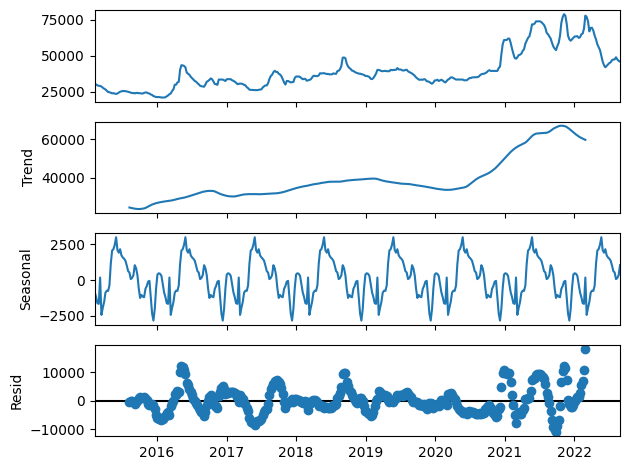

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


data = data = pd.read_csv('data/train.csv')
data.dt = pd.to_datetime(data.dt) # Приводим дату в тип pandas
data = data.set_index('dt')

# Декомпозиция временного ряда
decomposition = seasonal_decompose(data, model='additive')

# Визуализация компонентов
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

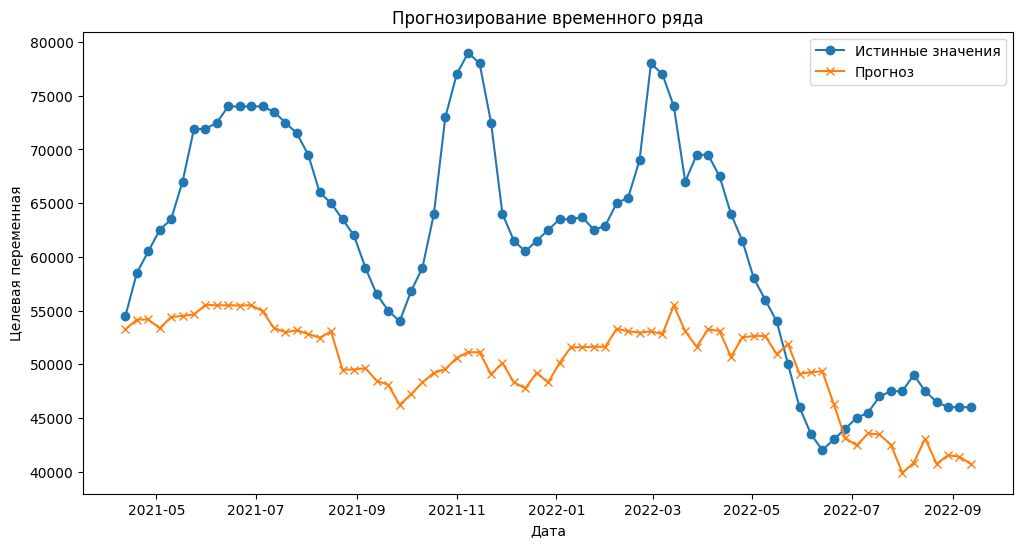

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

# 1. Загрузка данных
df = pd.read_csv('data/full.csv')

# Преобразование колонки с датой в формат datetime
df['dt'] = pd.to_datetime(df['dt'])

# Установка даты в качестве индекса
df.set_index('dt', inplace=True)

# 2. Декомпозиция временного ряда
# Убедитесь, что целевая переменная и дата не содержат пропусков
df.dropna(subset=['pfr'], inplace=True)

# Декомпозиция
decomposition = seasonal_decompose(df['pfr'], model='additive')

# Извлечение компонентов
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 3. Создание DataFrame с компонентами
df['trend'] = trend
df['seasonal'] = seasonal
df['residual'] = residual

# Удаление NaN значений (в начале и в конце)
df = df.dropna()

# Создание дополнительных признаков
df['month'] = df.index.month
df['year'] = df.index.year

# Определение целевой переменной и признаков
X = df[['trend', 'seasonal'] + [col for col in df.columns if col not in ['pfr', 'trend', 'seasonal', 'residual']]]
y = df['pfr']

# 4. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Обучение модели CatBoost
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, silent=True)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Истинные значения', marker='o')
plt.plot(df.index[-len(y_test):], y_pred, label='Прогноз', marker='x')
plt.legend()
plt.title('Прогнозирование временного ряда')
plt.xlabel('Дата')
plt.ylabel('Целевая переменная')
plt.show()